
## Ireland Hotels Data Cleaning & Analysis

### 📋 Project Overview
This comprehensive analysis of 501 Irish hotels provides valuable insights for tourism stakeholders, investors, and hospitality professionals.

### Dataset Information
- **File**: `hotels.csv`
- **Records**: 501 hotels
- **Features**: 16 original columns

### Project Workflow
1. **Data Loading & Initial Inspection**
2. **Handling Duplicates & Null Values**
3. **Feature Engineering & Type Conversion**
4. **Data Validation & Quality Checks**
5. **Exploratory Data Analysis (EDA)**
6. **Export Cleaned Dataset**

### Technical Details
- **Language**: Python
- **Main Libraries**: Pandas, NumPy, Matplotlib, Seaborn
- **Output**: Cleaned dataset with validated and enhanced features

### Author

**Dinesh Barri**  
**Date**: 15-11-2025

---


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import re

In [4]:
data = pd.read_csv("hotels.csv", encoding = 'UTF-8')

In [5]:
data.head()

,hotel name,city,certification,score,review rate,reviews,room type,occupancy,Free cancellation,pay at the property,No prepayment needed,rooms left,nights/adults,price,location rate,bb included
0,"Radisson Blu Hotel, Athlone",Athlone,Sustainability certification,7.9,Good,"6,092 reviews",Standard Room,Beds: 1 double or 2 twins,Free cancellation,– pay at the property,No prepayment needed,Only 5 rooms left at this price on our site,"1 night, 2 adults",€ 259,NaN,NaN
1,Sheraton Athlone Hotel,Athlone,Sustainability certification,8.7,Excellent,"5,418 reviews",Classic King Room,1 king bed,Free cancellation,NaN,NaN,Only 5 rooms left at this price on our site,"1 night, 2 adults",€ 275,Location 9.4,NaN
2,Clayton Hotel Dublin Airport,Cloghran,Sustainability certification,8.3,Very Good,"23,489 reviews",Deluxe Double & Single Room,"2 beds (1 twin, 1 full)",Free cancellation,NaN,NaN,NaN,"1 night, 2 adults",€ 259,NaN,NaN
3,Lawlors Hotel,Naas,NaN,8.8,Excellent,"2,379 reviews",Twin Room,2 full beds,Free cancellation,– pay at the property,No prepayment needed,Only 2 rooms left at this price on our site,"1 night, 2 adults",€ 329,Location 9.4,NaN
4,The Glendalough Hotel,Laragh,NaN,7.1,Good,989 reviews,Double or Twin Room,Beds: 1 double or 2 twins,NaN,NaN,NaN,Only 4 rooms left at this price on our site,"1 night, 2 adults",€ 220,Location 9.5,Breakfast included


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hotel name            501 non-null    object 
 1   city                  501 non-null    object 
 2   certification         136 non-null    object 
 3   score                 500 non-null    float64
 4   review rate           500 non-null    object 
 5   reviews               500 non-null    object 
 6   room type             501 non-null    object 
 7   occupancy             501 non-null    object 
 8   Free cancellation     296 non-null    object 
 9   pay at the property   180 non-null    object 
 10  No prepayment needed  180 non-null    object 
 11  rooms left            337 non-null    object 
 12  nights/adults         501 non-null    object 
 13  price                 501 non-null    object 
 14  location rate         158 non-null    object 
 15  bb included           1

### Insights from .info()

- A lot of features with null values.
- change data type of columns 'reviews', 'rooms left', 'price'.
- drop columns 'certification', 'nights/adults','pay at the property'.
- 'Free cancellation','No prepayment needed', 'bb included' are binary features.


### Step-by-step list

- Checking for duplicates rows.
- Checking Null rows or rows that won't have enough information.
- Dropping columns that won't be used.
- Converting 'reviews' into numeric.
- Cleaning 'location rate' feature.
- Removing € sign from 'price' and converting into float.
- Cleaning categorical features. Filling null values with information.
- Cleaning 'rooms left' and converting into numeric value.
- Save file

### Checking for duplicates

In [7]:
duplicates = data[data.duplicated]

data.drop_duplicates(inplace=True)

### Checking for entire rows with null values

In [8]:
all_null_rows = data[data.isnull().all(axis=1)]
data.dropna(axis=0, how='all', inplace = True)

### Dropping columns that won't be used.

In [9]:
print("\n")
print(data['certification'].value_counts())
print("\n")
print(data['nights/adults'].value_counts())



certification
Sustainability certification    91
•  •  •  •                       7
•  •  •                          5
Managed by a private host        4
•  •                             3
•  •  •  •  •                    2
Name: count, dtype: int64


nights/adults
1 night, 2 adults    451
Name: count, dtype: int64


In [10]:
data.drop(columns=['certification'], inplace = True)
data.drop(columns=['nights/adults'], inplace = True)
data.drop(columns=['pay at the property'], inplace = True)

### Converting 'reviews' into numeric.

In [11]:
rows_with_nan_reviews = data[data['reviews'].isna()]
rows_with_nan_reviews

,hotel name,city,score,review rate,reviews,room type,occupancy,Free cancellation,No prepayment needed,rooms left,price,location rate,bb included
492,The Marcy Boutique Accommodation,Drogheda,NaN,NaN,NaN,Double Room,1 full bed,NaN,NaN,Only 5 rooms left at this price on our site,€ 179,NaN,NaN


In [12]:
data.drop(data[data['hotel name'] == 'The Marcy Boutique Accommodation'].index, inplace=True)

In [13]:
data['reviews'] = data['reviews'].str.replace('reviews', '')

In [14]:
data['reviews'] = data['reviews'].str.replace(',', '').str.strip().astype(int)

In [15]:
data.head()

,hotel name,city,score,review rate,reviews,room type,occupancy,Free cancellation,No prepayment needed,rooms left,price,location rate,bb included
0,"Radisson Blu Hotel, Athlone",Athlone,7.9,Good,6092,Standard Room,Beds: 1 double or 2 twins,Free cancellation,No prepayment needed,Only 5 rooms left at this price on our site,€ 259,NaN,NaN
1,Sheraton Athlone Hotel,Athlone,8.7,Excellent,5418,Classic King Room,1 king bed,Free cancellation,NaN,Only 5 rooms left at this price on our site,€ 275,Location 9.4,NaN
2,Clayton Hotel Dublin Airport,Cloghran,8.3,Very Good,23489,Deluxe Double & Single Room,"2 beds (1 twin, 1 full)",Free cancellation,NaN,NaN,€ 259,NaN,NaN
3,Lawlors Hotel,Naas,8.8,Excellent,2379,Twin Room,2 full beds,Free cancellation,No prepayment needed,Only 2 rooms left at this price on our site,€ 329,Location 9.4,NaN
4,The Glendalough Hotel,Laragh,7.1,Good,989,Double or Twin Room,Beds: 1 double or 2 twins,NaN,NaN,Only 4 rooms left at this price on our site,€ 220,Location 9.5,Breakfast included


### Cleaning 'location rate' feature

In [16]:
print("\n")
print(data['location rate'].value_counts())



location rate
Location 9.6    35
Location 9.4    34
Location 9.3    24
Location 9.5    21
Location 9.7    18
Location 9.8    10
Name: count, dtype: int64


In [17]:
data['location rate'] = data['location rate'].str.replace('Location', '')

In [18]:
data['location rate'] = data['location rate'].fillna('No rated')

### Removing € sign from 'price' and converting into float.

In [19]:
data['price'] = data['price'].str.replace('€', '')

data['price'] = data['price'].str.replace('\xa0', '').str.replace(',', '').astype(float)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 500
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hotel name            450 non-null    object 
 1   city                  450 non-null    object 
 2   score                 450 non-null    float64
 3   review rate           450 non-null    object 
 4   reviews               450 non-null    int64  
 5   room type             450 non-null    object 
 6   occupancy             450 non-null    object 
 7   Free cancellation     266 non-null    object 
 8   No prepayment needed  162 non-null    object 
 9   rooms left            308 non-null    object 
 10  price                 450 non-null    float64
 11  location rate         450 non-null    object 
 12  bb included           161 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 49.2+ KB


### Cleaning categorical features. Filling null values with information.

In [21]:
print(data['review rate'].value_counts())
print(data['review rate'].unique())

print("\n")
print(data['Free cancellation'].value_counts())
print(data['Free cancellation'].unique())


print("\n")
print(data['No prepayment needed'].value_counts())
print(data['No prepayment needed'].unique())

print("\n")
print(data['bb included'].value_counts())
print(data['bb included'].unique())


review rate
Very Good       193
Excellent       125
Good             73
Wonderful        46
Review score      9
Exceptional       4
Name: count, dtype: int64
['Good' 'Excellent' 'Very Good' 'Wonderful' 'Review score' 'Exceptional']


Free cancellation
Free cancellation    266
Name: count, dtype: int64
['Free cancellation' nan]


No prepayment needed
No prepayment needed    162
Name: count, dtype: int64
['No prepayment needed' nan]


bb included
Breakfast included    161
Name: count, dtype: int64
[nan 'Breakfast included']


In [22]:
data['review rate'] = data['review rate'].str.replace('Review score', 'Not Good')

data['Free cancellation'] = data['Free cancellation'].fillna('Check Policy')

data['No prepayment needed'] = data['No prepayment needed'].fillna('Prepayment needed')

data['bb included'] = data['bb included'].fillna('Room Only')

### Cleaning 'rooms left' and converting into numeric value.

In [23]:
print(data['rooms left'].value_counts())

print("\n")
print(data['rooms left'].unique())

rooms left
Only 1 room left at this price on our site     87
Only 4 rooms left at this price on our site    48
Only 2 rooms left at this price on our site    47
Only 3 rooms left at this price on our site    44
Only 5 rooms left at this price on our site    31
Only 6 rooms left at this price on our site    24
Only 1 left at this price on our site          14
Only 7 rooms left at this price on our site     9
Only 2 left at this price on our site           2
Only 3 left at this price on our site           1
Only 6 left at this price on our site           1
Name: count, dtype: int64


['Only 5 rooms left at this price on our site' nan
 'Only 2 rooms left at this price on our site'
 'Only 4 rooms left at this price on our site'
 'Only 1 room left at this price on our site'
 'Only 3 rooms left at this price on our site'
 'Only 6 rooms left at this price on our site'
 'Only 1 left at this price on our site'
 'Only 7 rooms left at this price on our site'
 'Only 3 left at this price on our sit

In [24]:
data['rooms left'] = data['rooms left'].fillna('0') # Means there are no rooms available

data['rooms left'] = data['rooms left'].apply(lambda x: re.findall(r'\d+', str(x)))

data['rooms left'] = data['rooms left'].apply(lambda x: ','.join(x))

data['rooms left'] = pd.to_numeric(data['rooms left'])

In [25]:
print(data['rooms left'].value_counts())

rooms left
0    142
1    101
2     49
4     48
3     45
5     31
6     25
7      9
Name: count, dtype: int64


### Data is cleaned

In [26]:
# For interactive plots (if using in Jupyter)
from IPython.display import display, HTML

# Display basic stats in a nice format
display(HTML("<h3>📈 Quick Dataset Overview</h3>"))
display(data.head().style.background_gradient(cmap='Blues'))

# Add a completion message with emojis
print("\n" + "✨" * 50)
print("🎯 DATA CLEANING PIPELINE COMPLETED! 🎯")
print("✨" * 50)
print("\nNext steps:")
print("✅ Data is cleaned and ready for analysis")
print("✅ Visualizations provide business insights")
print("✅ Dataset exported for further use")
print("✅ Quality report generated for validation")

,hotel name,city,score,review rate,reviews,room type,occupancy,Free cancellation,No prepayment needed,rooms left,price,location rate,bb included
0,"Radisson Blu Hotel, Athlone",Athlone,7.900000,Good,6092,Standard Room,Beds: 1 double or 2 twins,Free cancellation,No prepayment needed,5,259.000000,No rated,Room Only
1,Sheraton Athlone Hotel,Athlone,8.700000,Excellent,5418,Classic King Room,1 king bed,Free cancellation,Prepayment needed,5,275.000000,9.4,Room Only
2,Clayton Hotel Dublin Airport,Cloghran,8.300000,Very Good,23489,Deluxe Double & Single Room,"2 beds (1 twin, 1 full)",Free cancellation,Prepayment needed,0,259.000000,No rated,Room Only
3,Lawlors Hotel,Naas,8.800000,Excellent,2379,Twin Room,2 full beds,Free cancellation,No prepayment needed,2,329.000000,9.4,Room Only
4,The Glendalough Hotel,Laragh,7.100000,Good,989,Double or Twin Room,Beds: 1 double or 2 twins,Check Policy,Prepayment needed,4,220.000000,9.5,Breakfast included



✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
🎯 DATA CLEANING PIPELINE COMPLETED! 🎯
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨

Next steps:
✅ Data is cleaned and ready for analysis
✅ Visualizations provide business insights
✅ Dataset exported for further use
✅ Quality report generated for validation


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 500
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hotel name            450 non-null    object 
 1   city                  450 non-null    object 
 2   score                 450 non-null    float64
 3   review rate           450 non-null    object 
 4   reviews               450 non-null    int64  
 5   room type             450 non-null    object 
 6   occupancy             450 non-null    object 
 7   Free cancellation     450 non-null    object 
 8   No prepayment needed  450 non-null    object 
 9   rooms left            450 non-null    int64  
 10  price                 450 non-null    float64
 11  location rate         450 non-null    object 
 12  bb included           450 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 49.2+ KB


### Saving csv file

In [28]:
data.to_csv('hotels_cleaned.csv')

ADVANCED DATA VISUALIZATION


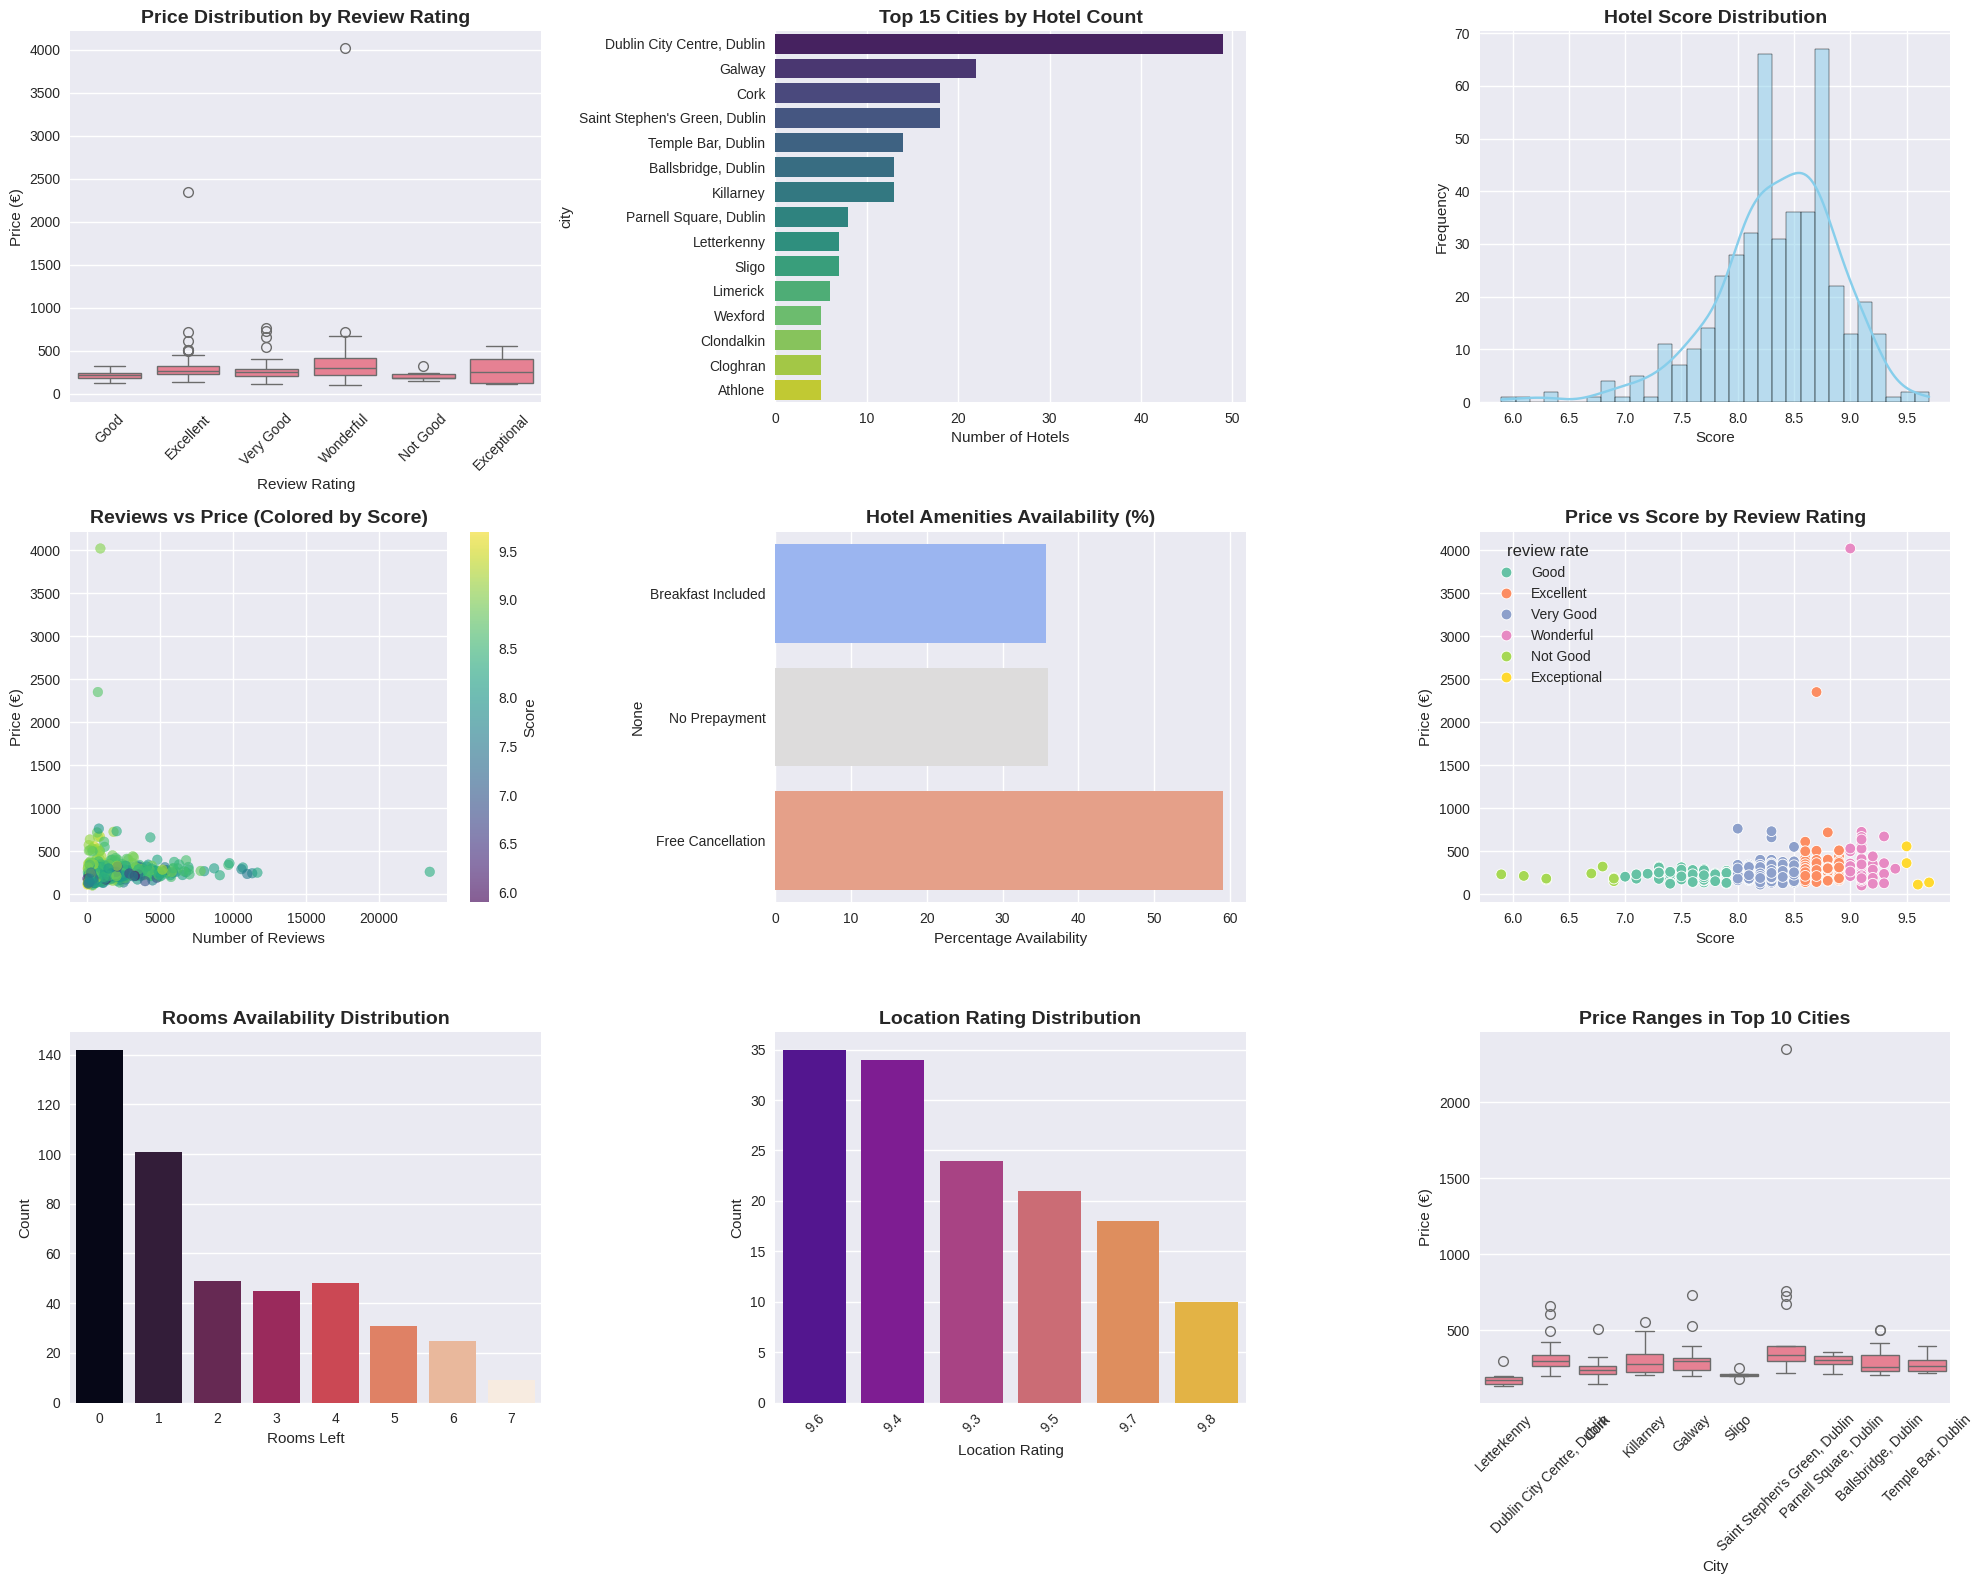


STATISTICAL SUMMARY
Average Price: €276.53
Average Score: 8.3/10
Average Reviews: 2095
Average Rooms Left: 2.0


In [39]:
# Add this comprehensive visualization section after data cleaning

# =============================================================================
# ADVANCED DATA VISUALIZATION & BUSINESS INSIGHTS
# =============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import warnings

# Filter out ALL font warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Set professional styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

print("ADVANCED DATA VISUALIZATION")
print("=" * 50)

# Create a dashboard-style visualization
fig = plt.figure(figsize=(20, 16))
gs = GridSpec(3, 3, figure=fig)

# 1. Price Distribution by Review Rating
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(data=data, x='review rate', y='price', ax=ax1)
ax1.set_title('Price Distribution by Review Rating', fontsize=14, fontweight='bold')
ax1.set_xlabel('Review Rating')
ax1.set_ylabel('Price (€)')
plt.xticks(rotation=45)

# 2. Top 15 Cities by Hotel Count
ax2 = fig.add_subplot(gs[0, 1])
top_cities = data['city'].value_counts().head(15)
sns.barplot(y=top_cities.index, x=top_cities.values, ax=ax2, hue=top_cities.index,
            palette='viridis', legend=False)
ax2.set_title('Top 15 Cities by Hotel Count', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Hotels')

# 3. Score Distribution
ax3 = fig.add_subplot(gs[0, 2])
sns.histplot(data['score'], bins=30, kde=True, ax=ax3, color='skyblue')
ax3.set_title('Hotel Score Distribution', fontsize=14, fontweight='bold')
ax3.set_xlabel('Score')
ax3.set_ylabel('Frequency')

# 4. Reviews vs Price Scatter Plot
ax4 = fig.add_subplot(gs[1, 0])
scatter = ax4.scatter(data['reviews'], data['price'], alpha=0.6, c=data['score'], cmap='viridis')
plt.colorbar(scatter, ax=ax4, label='Score')
ax4.set_title('Reviews vs Price (Colored by Score)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Number of Reviews')
ax4.set_ylabel('Price (€)')

# 5. Amenities Analysis
ax5 = fig.add_subplot(gs[1, 1])
amenities_data = pd.DataFrame({
    'Free Cancellation': data['Free cancellation'] == 'Free cancellation',
    'Breakfast Included': data['bb included'] == 'Breakfast included',
    'No Prepayment': data['No prepayment needed'] == 'No prepayment needed'
}).mean().sort_values(ascending=True)

sns.barplot(y=amenities_data.index, x=amenities_data.values * 100, ax=ax5,
            hue=amenities_data.index, palette='coolwarm', legend=False)
ax5.set_title('Hotel Amenities Availability (%)', fontsize=14, fontweight='bold')
ax5.set_xlabel('Percentage Availability')

# 6. Price vs Score Correlation
ax6 = fig.add_subplot(gs[1, 2])
sns.scatterplot(data=data, x='score', y='price', hue='review rate', ax=ax6, palette='Set2', s=60)
ax6.set_title('Price vs Score by Review Rating', fontsize=14, fontweight='bold')
ax6.set_xlabel('Score')
ax6.set_ylabel('Price (€)')

# 7. Rooms Left Analysis
ax7 = fig.add_subplot(gs[2, 0])
rooms_left_dist = data['rooms left'].value_counts().sort_index()
sns.barplot(x=rooms_left_dist.index, y=rooms_left_dist.values, ax=ax7,
            hue=rooms_left_dist.index, palette='rocket', legend=False)
ax7.set_title('Rooms Availability Distribution', fontsize=14, fontweight='bold')
ax7.set_xlabel('Rooms Left')
ax7.set_ylabel('Count')

# 8. Location Rate Distribution
ax8 = fig.add_subplot(gs[2, 1])
location_rates = data[data['location rate'] != 'No rated']['location rate'].value_counts()
sns.barplot(x=location_rates.index, y=location_rates.values, ax=ax8,
            hue=location_rates.index, palette='plasma', legend=False)
ax8.set_title('Location Rating Distribution', fontsize=14, fontweight='bold')
ax8.set_xlabel('Location Rating')
ax8.set_ylabel('Count')
plt.xticks(rotation=45)

# 9. Price Range Analysis by City (Top 10)
ax9 = fig.add_subplot(gs[2, 2])
top_10_cities = data['city'].value_counts().head(10).index
top_cities_data = data[data['city'].isin(top_10_cities)]
sns.boxplot(data=top_cities_data, x='city', y='price', ax=ax9)
ax9.set_title('Price Ranges in Top 10 Cities', fontsize=14, fontweight='bold')
ax9.set_xlabel('City')
ax9.set_ylabel('Price (€)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Additional Statistical Analysis
print("\nSTATISTICAL SUMMARY")
print("=" * 30)
print(f"Average Price: €{data['price'].mean():.2f}")
print(f"Average Score: {data['score'].mean():.1f}/10")
print(f"Average Reviews: {data['reviews'].mean():.0f}")
print(f"Average Rooms Left: {data['rooms left'].mean():.1f}")

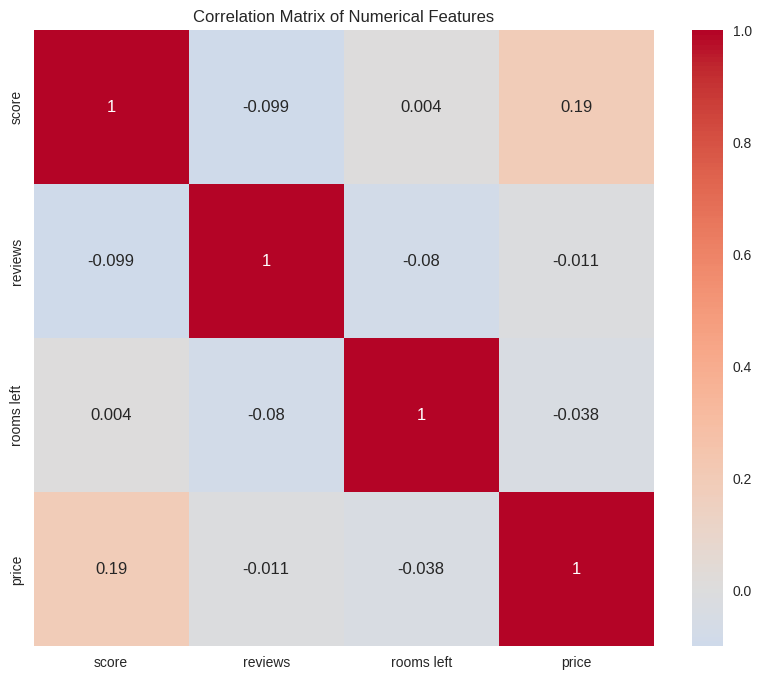

In [30]:
# 5. Correlation Heatmap (for numerical features)
plt.figure(figsize=(10, 8))
numerical_features = ['score', 'reviews', 'rooms left', 'price']
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [35]:
# =============================================================================
# BUSINESS INSIGHTS
# =============================================================================

print("💡 BUSINESS INSIGHTS")
print("=" * 50)

# Insight 1: Premium Pricing Analysis
premium_hotels = data[data['price'] > data['price'].quantile(0.75)]
print(f"\n💰 PREMIUM HOTELS ANALYSIS (Top 25% by Price):")
print(f"• Average premium price: €{premium_hotels['price'].mean():.2f}")
print(f"• Average premium score: {premium_hotels['score'].mean():.1f}")
print(f"• Breakfast inclusion rate: {(premium_hotels['bb included'] == 'Breakfast included').mean()*100:.1f}%")

# Insight 2: High-Rated Budget Hotels
budget_high_rated = data[(data['price'] < data['price'].quantile(0.25)) &
                         (data['score'] > 8.5)]
print(f"\n⭐ HIGH-RATED BUDGET HOTELS:")
print(f"• Count: {len(budget_high_rated)} hotels")
print(f"• Average price: €{budget_high_rated['price'].mean():.2f}")
print(f"• Average score: {budget_high_rated['score'].mean():.1f}")


# Top 10 most expensive hotels
print("\n 🏨 TOP 10 MOST EXPENSIVE HOTELS:")
top_expensive = data.nlargest(10, 'price')[['hotel name', 'city', 'price', 'score']]
print(top_expensive.to_string(index=False))

print("\n⭐ TOP 10 HIGHEST RATED HOTELS (with min 50 reviews):")
high_rated = data[data['reviews'] >= 50].nlargest(10, 'score')[['hotel name', 'city', 'score', 'price']]
print(high_rated.to_string(index=False))

print("\n💰 PRICE ANALYSIS:")
print(f"Average Price: €{data['price'].mean():.2f}")
print(f"Median Price: €{data['price'].median():.2f}")
print(f"Minimum Price: €{data['price'].min():.2f}")
print(f"Maximum Price: €{data['price'].max():.2f}")

print("\n🏙️ GEOGRAPHICAL DISTRIBUTION:")
print(f"Total Cities: {data['city'].nunique()}")
print(f"City with Most Hotels: {data['city'].value_counts().index[0]} ({data['city'].value_counts().iloc[0]} hotels)")

💡 BUSINESS INSIGHTS

💰 PREMIUM HOTELS ANALYSIS (Top 25% by Price):
• Average premium price: €440.45
• Average premium score: 8.6
• Breakfast inclusion rate: 39.3%

⭐ HIGH-RATED BUDGET HOTELS:
• Count: 31 hotels
• Average price: €162.06
• Average score: 8.9

 🏨 TOP 10 MOST EXPENSIVE HOTELS:
                           hotel name                          city  price  score
Carton House A Fairmont Managed hotel                      Maynooth 4020.0    9.0
 The Shelbourne, Autograph Collection Saint Stephen's Green, Dublin 2350.0    8.7
                         Kellys Hotel Saint Stephen's Green, Dublin  761.0    8.0
                          The g Hotel                        Galway  731.0    8.3
              Trinity Townhouse Hotel Saint Stephen's Green, Dublin  724.0    9.1
                    Lough Eske Castle                       Donegal  717.0    8.8
                    The Merrion Hotel Saint Stephen's Green, Dublin  670.0    9.3
                    Cliff House Hotel                